In [1]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [2]:
# Load csv file
loss_df = pd.read_csv("2017_2022_EPL.csv")
loss_df

,Year,Rk,Squad,MP,W,D,L,GF,GA,GD,Pts,Pts/MP,xG,xGA,xGD,xGD/90,Attendance
0,2017_2018,1,15,38,32,4,2,106,27,79,100,2.63,86.4,22.8,63.6,1.67,54070
1,2017_2018,2,16,38,25,6,7,68,28,40,81,2.13,60.7,41.7,18.9,0.50,74976
2,2017_2018,3,23,38,23,8,7,74,36,38,77,2.03,67.3,35.0,32.3,0.85,67953
3,2017_2018,4,14,38,21,12,5,84,38,46,75,1.97,72.8,34.0,38.8,1.02,53049
4,2017_2018,5,7,38,21,7,10,62,38,24,70,1.84,57.9,35.3,22.7,0.60,41282
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,2021_2022,16,9,38,11,6,21,43,66,-23,39,1.03,42.8,54.5,-11.7,-0.31,38446
96,2021_2022,17,12,38,9,11,18,42,79,-37,38,1.00,47.2,70.1,-23.0,-0.60,36308
97,2021_2022,18,5,38,7,14,17,34,53,-19,35,0.92,39.0,56.7,-17.7,-0.47,19278
98,2021_2022,19,24,38,6,5,27,34,77,-43,23,0.61,38.8,66.6,-27.8,-0.73,20614


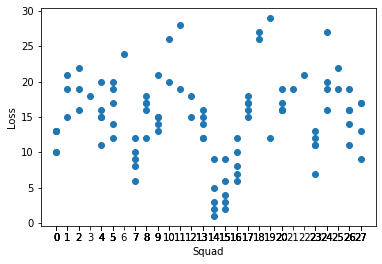

In [3]:
# Visually inspect relationship between Points and Squad
plt.scatter(loss_df.Squad, loss_df.L)
plt.xticks(loss_df.Squad)
plt.xlabel("Squad")
plt.ylabel("Loss")
plt.show()

In [5]:
# Attribute and label
X = loss_df['Squad'].values.reshape(-1,1)
y = loss_df['L'].values.reshape(-1,1)

In [6]:
# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [7]:
# Instantiate it and fit the model
regressor = LinearRegression()  
regressor.fit(X_train, y_train) #training the algorithm


LinearRegression()

In [8]:
#To retrieve the intercept:
print(regressor.intercept_)

#For retrieving the slope:
print(regressor.coef_)

[14.13331209]
[[0.01888118]]


In [9]:
# Make predictions 
y_pred = regressor.predict(X_test)

In [10]:
# Compare the actual output values
loss_df2 = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
loss_df2

,Actual,Predicted
0,13,14.643104
1,14,14.624223
2,7,14.567579
3,19,14.624223
4,15,14.208837
5,19,14.152193
6,16,14.510936
7,18,14.284362
8,15,14.208837
9,21,14.303243


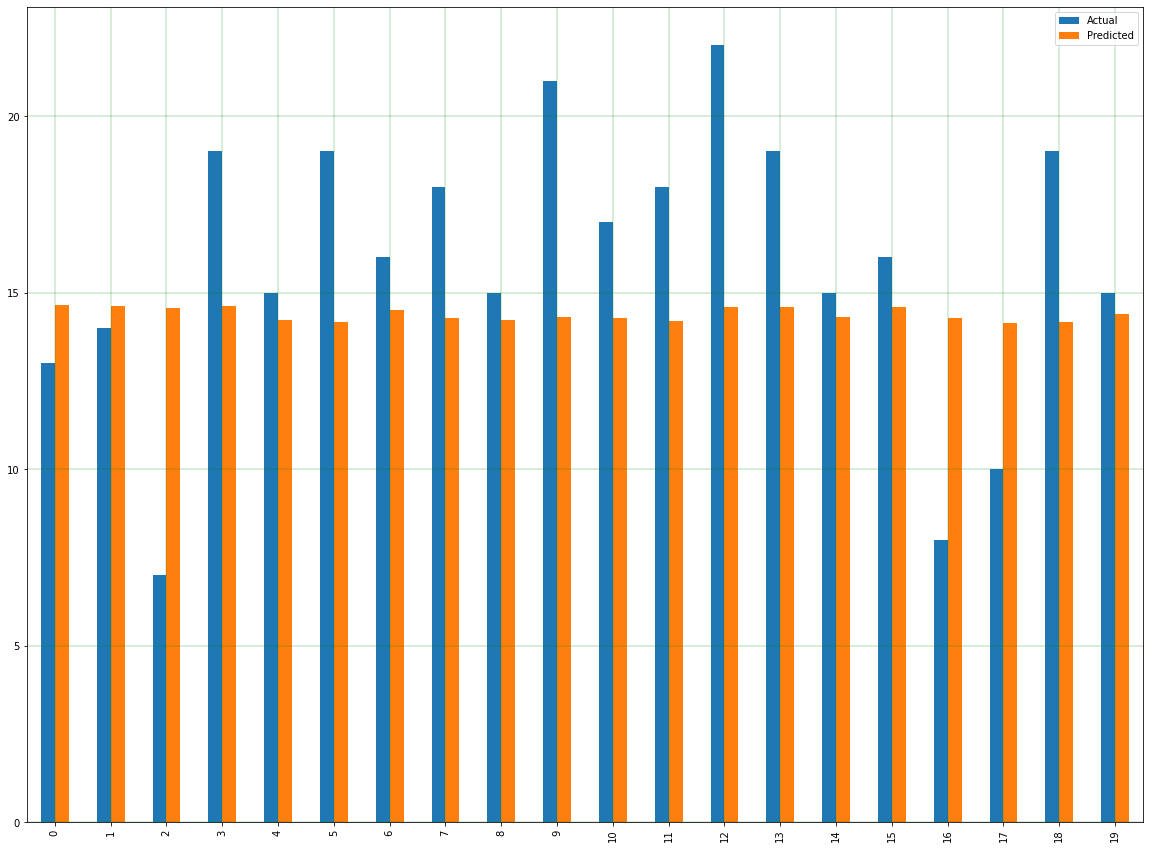

In [11]:
# Visualize as bar graph
loss_df2 = loss_df2.head(25)
loss_df2.plot(kind='bar',figsize=(20,15))
plt.grid(which='major', linestyle='-', linewidth='0.3', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()